In [243]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [244]:
train_data =pd.read_csv ("train.csv")

In [245]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [246]:
train_data.head(50)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [247]:
test_data =pd.read_csv("test.csv")
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [248]:
f_data =pd.read_csv('features.csv')
f_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [249]:
s_data =pd.read_csv("stores.csv")
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


feature engineering

In [250]:
train_data['Date'] =pd.to_datetime(train_data ['Date'])
train_data['DayOfWeek'] =train_data['Date'].dt.day_of_week
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] =train_data['Date'].dt.year
train_data


,Store,Dept,Date,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,2010-02-05,24924.50,False,4,2,2010
1,1,1,2010-02-12,46039.49,True,4,2,2010
2,1,1,2010-02-19,41595.55,False,4,2,2010
3,1,1,2010-02-26,19403.54,False,4,2,2010
4,1,1,2010-03-05,21827.90,False,4,3,2010
...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,4,9,2012
421566,45,98,2012-10-05,628.10,False,4,10,2012
421567,45,98,2012-10-12,1061.02,False,4,10,2012
421568,45,98,2012-10-19,760.01,False,4,10,2012


In [251]:
train_data.fillna(0, inplace=True)
train_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'DayOfWeek',
       'Month', 'Year'],
      dtype='object')

In [252]:
test_data['Date'] =pd.to_datetime(test_data ['Date'])
test_data['DayOfWeek'] =test_data['Date'].dt.day_of_week
test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] =test_data['Date'].dt.year
train_data


,Store,Dept,Date,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,2010-02-05,24924.50,False,4,2,2010
1,1,1,2010-02-12,46039.49,True,4,2,2010
2,1,1,2010-02-19,41595.55,False,4,2,2010
3,1,1,2010-02-26,19403.54,False,4,2,2010
4,1,1,2010-03-05,21827.90,False,4,3,2010
...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,4,9,2012
421566,45,98,2012-10-05,628.10,False,4,10,2012
421567,45,98,2012-10-12,1061.02,False,4,10,2012
421568,45,98,2012-10-19,760.01,False,4,10,2012


In [253]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [254]:
data
data.drop("Date",axis=1)

,Store,Dept,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,24924.50,False,4,2,2010
1,1,1,46039.49,True,4,2,2010
2,1,1,41595.55,False,4,2,2010
3,1,1,19403.54,False,4,2,2010
4,1,1,21827.90,False,4,3,2010
...,...,...,...,...,...,...,...
536629,45,98,NaN,False,4,6,2013
536630,45,98,NaN,False,4,7,2013
536631,45,98,NaN,False,4,7,2013
536632,45,98,NaN,False,4,7,2013


In [255]:
data.dropna()
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,2010-02-05,24924.50,False,4,2,2010
1,1,1,2010-02-12,46039.49,True,4,2,2010
2,1,1,2010-02-19,41595.55,False,4,2,2010
3,1,1,2010-02-26,19403.54,False,4,2,2010
4,1,1,2010-03-05,21827.90,False,4,3,2010
...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False,4,6,2013
536630,45,98,2013-07-05,NaN,False,4,7,2013
536631,45,98,2013-07-12,NaN,False,4,7,2013
536632,45,98,2013-07-19,NaN,False,4,7,2013


In [256]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
DayOfWeek            0
Month                0
Year                 0
dtype: int64

In [257]:
data['Date'] =pd.to_datetime(data ['Date'])
data['DayOfWeek'] =data['Date'].dt.day_of_week
data['Month'] = data['Date'].dt.month
data['Year'] =train_data['Date'].dt.year
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,2010-02-05,24924.50,False,4,2,2010.0
1,1,1,2010-02-12,46039.49,True,4,2,2010.0
2,1,1,2010-02-19,41595.55,False,4,2,2010.0
3,1,1,2010-02-26,19403.54,False,4,2,2010.0
4,1,1,2010-03-05,21827.90,False,4,3,2010.0
...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False,4,6,NaN
536630,45,98,2013-07-05,NaN,False,4,7,NaN
536631,45,98,2013-07-12,NaN,False,4,7,NaN
536632,45,98,2013-07-19,NaN,False,4,7,NaN


In [258]:
data.drop("Date",axis=1)

,Store,Dept,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,24924.50,False,4,2,2010.0
1,1,1,46039.49,True,4,2,2010.0
2,1,1,41595.55,False,4,2,2010.0
3,1,1,19403.54,False,4,2,2010.0
4,1,1,21827.90,False,4,3,2010.0
...,...,...,...,...,...,...,...
536629,45,98,NaN,False,4,6,NaN
536630,45,98,NaN,False,4,7,NaN
536631,45,98,NaN,False,4,7,NaN
536632,45,98,NaN,False,4,7,NaN


In [259]:
# Print the column names to verify
print(data.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'DayOfWeek',
       'Month', 'Year'],
      dtype='object')


In [260]:
if 'Weekly_Sales' in data.columns:
    # Define features and Weekly_Sales variable
    X = data.drop('Weekly_Sales', axis=1)  # Replace 'Weekly_Sales' with your Weekly_Sales column name
    y = data['Weekly_Sales']               # Replace 'target' with your target column name
else:
    print("Target column not found in the combined data.")
    # Additional handling if the target column is missing

In [261]:
if 'date_column' in X_train.columns:
    X_train['year'] = pd.to_datetime(X_train['date_column']).dt.year
    X_train['month'] = pd.to_datetime(X_train['date_column']).dt.month
    X_train['day'] = pd.to_datetime(X_train['date_column']).dt.day
    X_train.drop('date_column', axis=1, inplace=True)  # Remove original DateTime column

if 'date_column' in X_test.columns:
    X_test['year'] = pd.to_datetime(X_test['date_column']).dt.year
    X_test['month'] = pd.to_datetime(X_test['date_column']).dt.month
    X_test['day'] = pd.to_datetime(X_test['date_column']).dt.day
    X_test.drop('date_column', axis=1, inplace=True)  # Remove original DateTime column


In [262]:
print(data.head())
data['IsHoliday'] = data['IsHoliday'].astype(int)


   Store  Dept       Date  Weekly_Sales  IsHoliday  DayOfWeek  Month    Year
0      1     1 2010-02-05      24924.50      False          4      2  2010.0
1      1     1 2010-02-12      46039.49       True          4      2  2010.0
2      1     1 2010-02-19      41595.55      False          4      2  2010.0
3      1     1 2010-02-26      19403.54      False          4      2  2010.0
4      1     1 2010-03-05      21827.90      False          4      3  2010.0


In [263]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,DayOfWeek,Month,Year
0,1,1,2010-02-05,24924.50,0,4,2,2010.0
1,1,1,2010-02-12,46039.49,1,4,2,2010.0
2,1,1,2010-02-19,41595.55,0,4,2,2010.0
3,1,1,2010-02-26,19403.54,0,4,2,2010.0
4,1,1,2010-03-05,21827.90,0,4,3,2010.0


In [264]:
X = data[['Store', 'Dept', 'IsHoliday', 'DayOfWeek', 'Month', 'Year']]
y = data['Weekly_Sales']


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Store            0
Dept             0
IsHoliday        0
DayOfWeek        0
Month            0
Year         92098
dtype: int64
92098


In [267]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Impute missing values in the 'Year' column
data['Year'] = imputer.fit_transform(data[['Year']])


In [268]:
# Drop rows with missing values in 'Year'
data = data.dropna(subset=['Year'])


In [269]:
# Ensure there are no missing values in the features
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with X_train

# If needed, apply similar cleaning to X_test and y_test
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align y_test with X_test


In [270]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with the median strategy for numerical values
imputer = SimpleImputer(strategy='median')

# Impute missing values in the 'Weekly_Sales' column
data['Weekly_Sales'] = imputer.fit_transform(data[['Weekly_Sales']])


In [271]:
print(data.isnull().sum())


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
DayOfWeek       0
Month           0
Year            0
dtype: int64


In [272]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = data[['Store', 'Dept', 'IsHoliday', 'DayOfWeek', 'Month', 'Year']]
y = data['Weekly_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

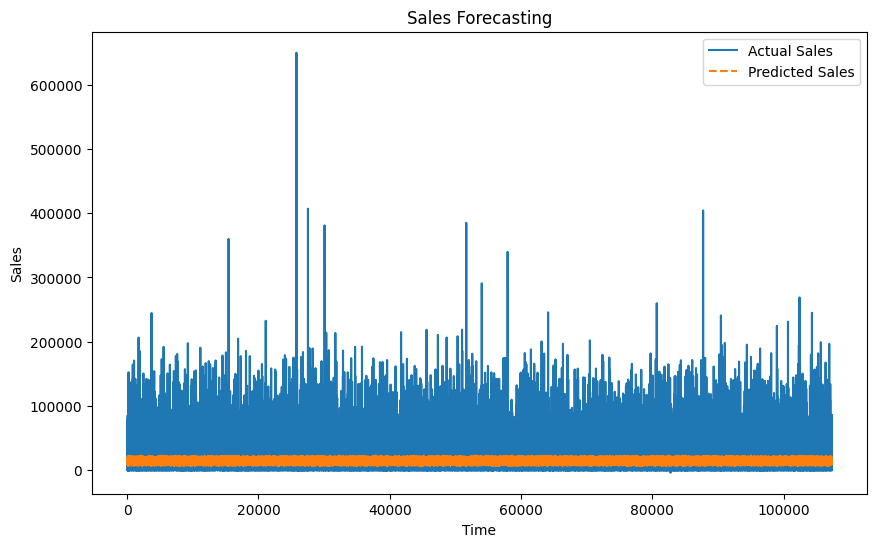

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', linestyle='--')
plt.title('Sales Forecasting')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()